In [3]:
#this is a new file because previous one had a problem
#this will the file which I will use for shipping data viz and more
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
%store -r ship_reduced

In [5]:
ship_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156711 entries, 0 to 156795
Data columns (total 15 columns):
shipping_day            156711 non-null datetime64[ns]
block                   153079 non-null object
strategy                156700 non-null float64
shape                   156700 non-null object
size                    156700 non-null object
div                     156711 non-null object
sku                     156711 non-null int64
material_description    156711 non-null object
shipment_tons           156711 non-null float64
segment                 154025 non-null object
sold-to_party           156711 non-null int64
ship-to_party           156711 non-null int64
postal_code             156711 non-null object
region_description      156711 non-null object
country                 156711 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 19.1+ MB


In [6]:
ship_reduced.head()

,shipping_day,block,strategy,shape,size,div,sku,material_description,shipment_tons,segment,sold-to_party,ship-to_party,postal_code,region_description,country
0,2020-01-29,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US
1,2020-01-07,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US
2,2020-01-24,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092318,100099655,37218-3813,Tennessee,US
3,2020-01-29,"3 X 2"" ANG",40.0,SHAPE_L,3X2X1/2,Merchants,106022002,"L 3X2X1/2 GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US
4,2020-01-27,"12"" CHN",40.0,SHAPE_C,12 X 20.7#,Merchants,106020260,"C 12X20.7# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092309,100095766,35954,Alabama,US


In [7]:
#trend by weeks for shipment tons
ship_reduced = ship_reduced.set_index('shipping_day')

,block,strategy,shape,size,div,sku,material_description,shipment_tons,segment,sold-to_party,ship-to_party,postal_code,region_description,country
shipping_day,,,,,,,,,,,,,,
2020-01-29,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US
2020-01-07,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US
2020-01-24,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092318,100099655,37218-3813,Tennessee,US


In [9]:
ship_reduced['Year'] = ship_reduced.index.year
ship_reduced['Month'] = ship_reduced.index.month
ship_reduced['Weekday Name'] = ship_reduced.index.weekday_name
ship_reduced.head(3)

,block,strategy,shape,size,div,sku,material_description,shipment_tons,segment,sold-to_party,ship-to_party,postal_code,region_description,country,Year,Month,Weekday Name
shipping_day,,,,,,,,,,,,,,,,,
2020-01-29,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US,2020,1,Wednesday
2020-01-07,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092779,100099953,72301-7103,Arkansas,US,2020,1,Tuesday
2020-01-24,"8"" CHN",40.0,SHAPE_C,8 X 11.5#,Merchants,106021716,"C 8X11.5# GGMULTI 40'00""",0.0,NA - DISTRIBUTION,100092318,100099655,37218-3813,Tennessee,US,2020,1,Friday


In [14]:
#shipment_by_month
totprod_by_month = ship_reduced.groupby("Month")["shipment_tons"].sum().sort_values(ascending=False)
totprod_by_month

Month
1     219918.0
5     208352.0
2     205149.0
6     196192.0
11    194587.0
10    193661.0
3     193434.0
4     193238.0
7     164064.0
9     159297.0
8     144842.0
12    135189.0
Name: shipment_tons, dtype: float64

In [22]:
totprod_by_week=ship_reduced.resample(rule='W').sum()
totprod_by_week.groupby(totprod_by_week.index.year).sum()

,strategy,sku,shipment_tons,sold-to_party,ship-to_party,Year,Month
shipping_day,,,,,,,
2015,1055979.0,2686637612039,378038.0,2514742152538,2515315744259,50630905,167864
2016,1206699.0,3040255922556,415037.0,2846784769952,2847638555227,57338953,177990
2017,1439761.0,3643388078446,432605.0,3413791568224,3414763136445,68793804,210559
2018,1307425.0,3271734970459,450785.0,3063816357716,3065217673006,61766944,184462
2019,1398004.0,3514180419461,455611.0,3289566781766,3291352477505,66352257,212182
2020,236895.0,595185745431,75847.0,556823099320,557287180223,11237233,8140


Text(0, 0.5, 'shipment_tons')

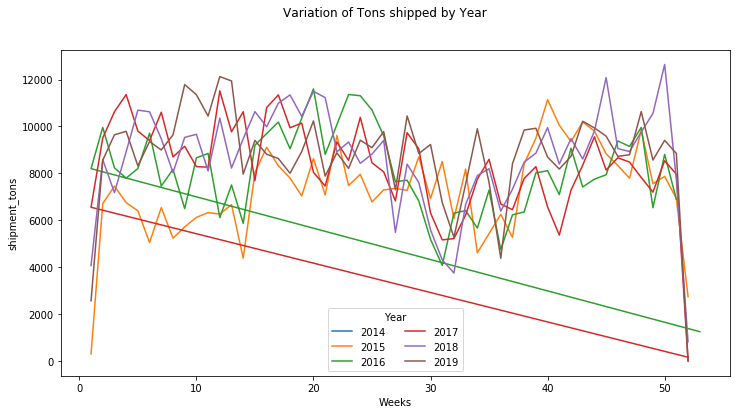

In [25]:
#Create figure and plots

#create weekly plots by year
year_2013 = totprod_by_week[totprod_by_week.index.year == 2013]
year_2014 = totprod_by_week[totprod_by_week.index.year == 2014]
year_2015 = totprod_by_week[totprod_by_week.index.year == 2015]
year_2016 = totprod_by_week[totprod_by_week.index.year == 2016]
year_2017 = totprod_by_week[totprod_by_week.index.year == 2017]
year_2018 = totprod_by_week[totprod_by_week.index.year == 2018]
year_2019 = totprod_by_week[totprod_by_week.index.year == 2019]
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Variation of Tons shipped by Year")


ax.plot(year_2014.index.week, year_2014["shipment_tons"], label=2014)
ax.plot(year_2015.index.week, year_2015["shipment_tons"], label=2015)
ax.plot(year_2016.index.week, year_2016["shipment_tons"], label=2016)
ax.plot(year_2017.index.week, year_2017["shipment_tons"], label=2017)
ax.plot(year_2018.index.week, year_2018["shipment_tons"], label=2018)
ax.plot(year_2019.index.week, year_2019["shipment_tons"], label=2019)
#Create legend & axis names
plt.legend(loc="best", title="Year", ncol=2)
ax.set_xlabel("Weeks")
ax.set_ylabel("shipment_tons")
